In [13]:
# Consider the data from lecture on 3/31:
# X=np.arange(0,31)
# Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
# 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])
# Fit the following model to the data with least-squares error
# (i) Write a code to find the minimum error and determine the parameters A, B, C, D

A = 2.1717269828948855
B = 0.909325796914226
C = 0.7324885143513572
D = 31.452772437053802
Minimum error: 1.5927258503103892


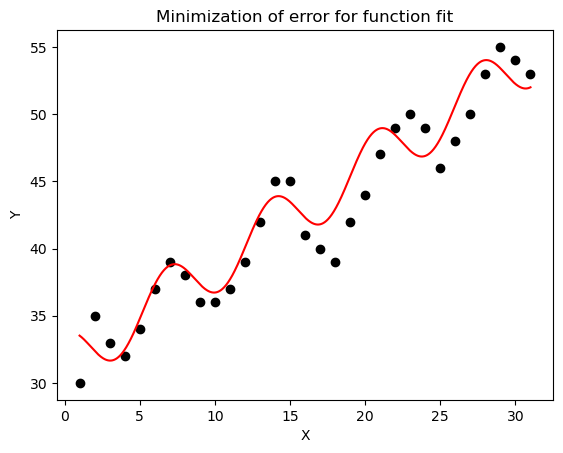

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to fit
def func(x, A, B, C, D):
    return A * np.cos(B * x) + C * x + D



# Define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# initial guesses for parameters A,B,C,D
initial_guess = [1,1,1,1]

# Fit the function to the data
popt, pcov = curve_fit(func, X, Y, initial_guess)

# Extract the parameters
A, B, C, D = popt

# Print the parameters
print("A =", A)
print("B =", B)
print("C =", C)
print("D =", D)

# Calculate the minimum error
n = len(X) #31

# Y_fit = func(X, A, B, C, D)
error = np.sqrt(np.sum((func(X, A, B, C, D) - Y)**2) / n)
print("Minimum error:", error)

tt = np.arange(1, 31.01, 0.01) #x axis
yfit = (A*np.cos(B*tt)+C*tt+D) #y axis

# Plot the data and the fitted function
plt.plot(np.arange(1, 32), Y, 'ko')
plt.plot(tt, yfit, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Minimization of error for function fit')
plt.show()


In [4]:
# A = 2.1717269828948855
# B = 0.909325796914226
# C = 0.7324885143513572
# D = 31.452772437053802
# Minimum error: 1.5927258503103892

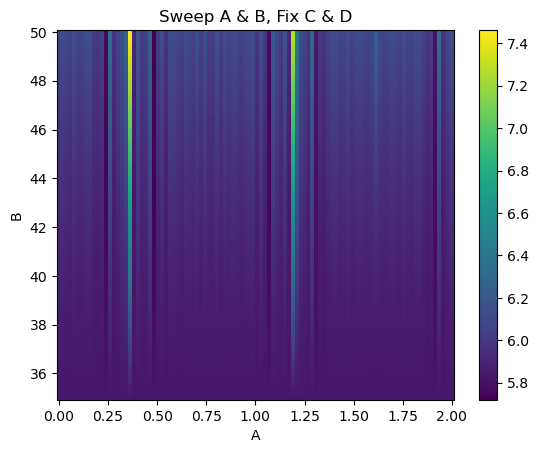

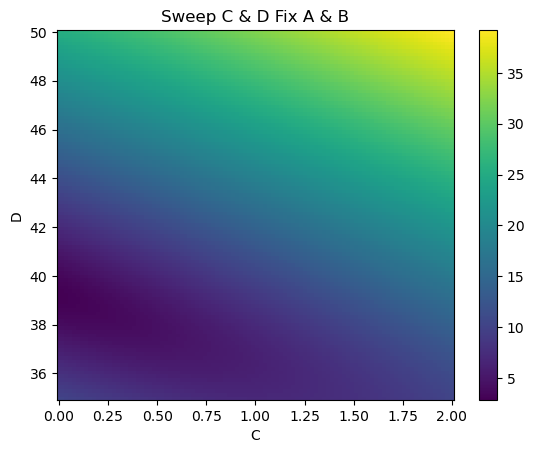

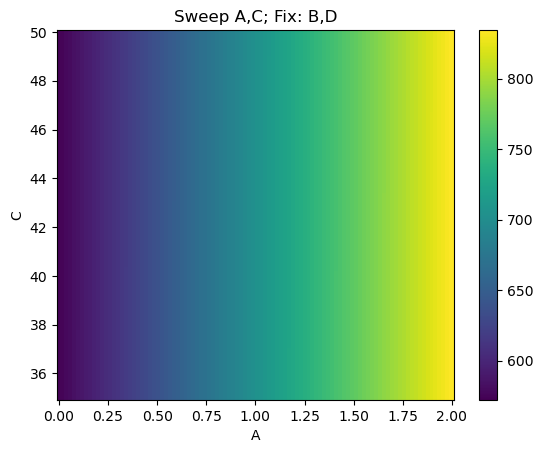

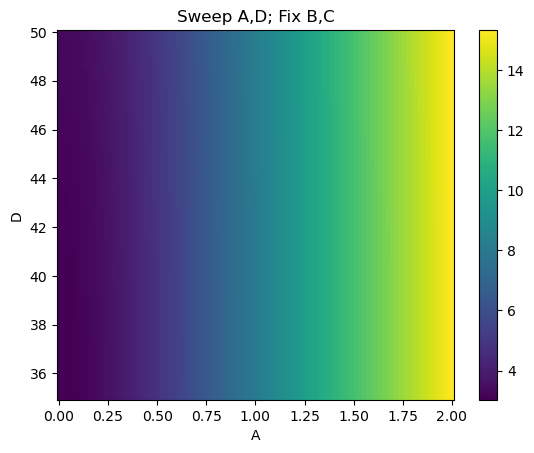

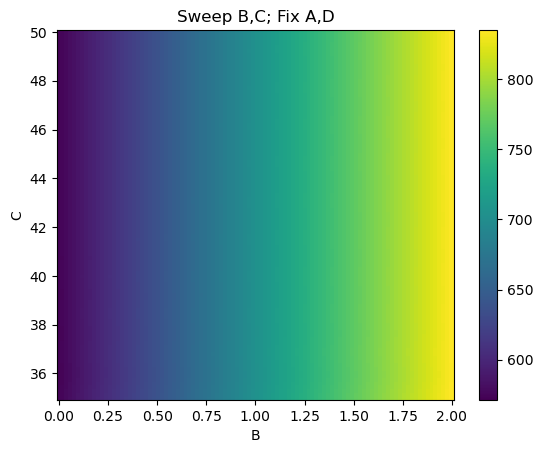

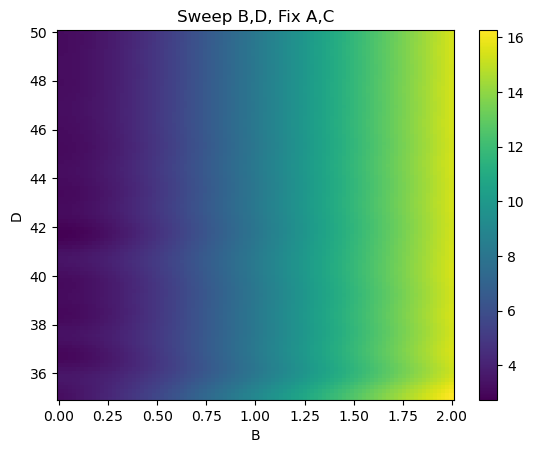

In [19]:
# (ii) With the results of (i), fix two of the parameters and sweep through values of the
# other two parameters to generate a 2D loss (error) landscape. Do all combinations of
# two fixed parameters and two swept parameters. You can use something like pcolor to
# visualize the results in a grid. How many minima can you find as you sweep through
# parameters?
import numpy as np
import matplotlib.pyplot as plt

# Define the function to fit
def func(x, A, B, C, D):
    return A * np.cos(B * x) + C * x + D

# Define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Sweep through 2 parameters (A,B) and fix two parameters (C,D)
A_vals = np.linspace(0, 2, 100)
B_vals = np.linspace(35, 50, 100)
C_fixed = C = 0.5
D_fixed = D = 40.0
error_vals = np.zeros((len(A_vals), len(B_vals)))
for i, A in enumerate(A_vals):
    for j, B in enumerate(B_vals):
        Y_fit = func(X, A, B, C, D)
        error_vals[i, j] = np.sqrt(np.sum((Y - Y_fit)**2) / len(X))

# Visualize the results as a grid
# X_grid, Y_grid = np.meshgrid(D_values, C_values)
fig, ax = plt.subplots()
plt.pcolor(A_vals, B_vals, error_vals, cmap='viridis') #viridis coolwarm
plt.title('Sweep A & B, Fix C & D')
plt.xlabel('A')
plt.ylabel('B')
plt.colorbar()
# plt.title('2D Loss Landscape for f(x) = A cos(Bx) + Cx + D with A={}, B={}'.format(A, B))
plt.show()
###################
# Fix two parameters and sweep through the other two parameters
C_vals = np.linspace(0, 2, 100)
D_vals = np.linspace(35, 50, 100)
A_fixed = A = 1.0
B_fixed = B = 1.0
error_vals = np.zeros((len(C_vals), len(D_vals)))
for i, C in enumerate(C_vals):
    for j, D in enumerate(D_vals):
        Y_fit = func(X, A, B, C, D)
        error_vals[i, j] = np.sqrt(np.sum((Y_fit - Y) ** 2) / len(X))

# Visualize the results
fig, ax = plt.subplots()
plt.pcolor(C_vals, D_vals, error_vals, cmap='viridis')
plt.xlabel('C')
plt.ylabel('D')
plt.title('Sweep C & D Fix A & B')
plt.colorbar()
plt.show()
######################
# Sweep through 2 parameters (A,B) and fix two parameters (C,D)
A_vals = np.linspace(0, 2, 100)
C_vals = np.linspace(35, 50, 100)
B_fixed = B = 1.0
D_fixed = D = 1.0
error_vals = np.zeros((len(A_vals), len(C_vals)))
for i, A in enumerate(A_vals):
    for j, C in enumerate(C_vals):
        Y_fit = func(X, A, B, C, D)
        error_vals[i, j] = np.sqrt(np.sum((Y - Y_fit)**2) / len(X))

# Visualize the results as a grid
# X_grid, Y_grid = np.meshgrid(D_values, C_values)
fig, ax = plt.subplots()
plt.pcolor(A_vals, C_vals, error_vals, cmap='viridis') #viridis coolwarm
# plt.colorbar()
plt.xlabel('A')
plt.ylabel('C')
plt.title('Sweep A,C; Fix: B,D')
plt.colorbar()
# plt.title('2D Loss Landscape for f(x) = A cos(Bx) + Cx + D with A={}, B={}'.format(A, B))
plt.show()
######################
# Sweep through 2 parameters (A,B) and fix two parameters (C,D)
A_vals = np.linspace(0, 2, 100)
D_vals = np.linspace(35, 50, 100)
B_fixed = B = 1.0
C_fixed = C = 0.5
error_vals = np.zeros((len(A_vals), len(D_vals)))
for i, A in enumerate(A_vals):
    for j, D in enumerate(D_vals):
        Y_fit = func(X, A, B, C, D)
        error_vals[i, j] = np.sqrt(np.sum((Y - Y_fit)**2) / len(X))

# Visualize the results as a grid
# X_grid, Y_grid = np.meshgrid(D_values, C_values)
fig, ax = plt.subplots()
plt.pcolor(A_vals, D_vals, error_vals, cmap='viridis') #viridis coolwarm
# plt.colorbar()
plt.xlabel('A')
plt.ylabel('D')
plt.title('Sweep A,D; Fix B,C')
plt.colorbar()
# plt.title('2D Loss Landscape for f(x) = A cos(Bx) + Cx + D with A={}, B={}'.format(A, B))
plt.show()
######################
# Sweep through 2 parameters (A,B) and fix two parameters (C,D)
B_vals = np.linspace(0, 2, 100)
C_vals = np.linspace(35, 50, 100)
A_fixed = A = 1.0
D_fixed = D = 0.5
error_vals = np.zeros((len(B_vals), len(C_vals)))
for i, B in enumerate(B_vals):
    for j, C in enumerate(C_vals):
        Y_fit = func(X, A, B, C, D)
        error_vals[i, j] = np.sqrt(np.sum((Y - Y_fit)**2) / len(X))

# Visualize the results as a grid
# X_grid, Y_grid = np.meshgrid(D_values, C_values)
fig, ax = plt.subplots()
plt.pcolor(B_vals, C_vals, error_vals, cmap='viridis') #viridis coolwarm
# plt.colorbar()
plt.title('Sweep B,C; Fix A,D')
plt.xlabel('B')
plt.ylabel('C')
plt.colorbar()
# plt.title('2D Loss Landscape for f(x) = A cos(Bx) + Cx + D with A={}, B={}'.format(A, B))
plt.show()
#############
# Sweep through 2 parameters (A,B) and fix two parameters (C,D)
B_vals = np.linspace(0, 2, 100)
D_vals = np.linspace(35, 50, 100)
A_fixed = A = 1.0
C_fixed = C = 0.5
error_vals = np.zeros((len(B_vals), len(D_vals)))
for i, B in enumerate(B_vals):
    for j, D in enumerate(D_vals):
        Y_fit = func(X, A, B, C, D)
        error_vals[i, j] = np.sqrt(np.sum((Y - Y_fit)**2) / len(X))

# Visualize the results as a grid
# X_grid, Y_grid = np.meshgrid(D_values, C_values)
fig, ax = plt.subplots()
plt.pcolor(B_vals, D_vals, error_vals, cmap='viridis') #viridis coolwarm
# plt.colorbar()
plt.title('Sweep B,D, Fix A,C')
plt.xlabel('B')
plt.ylabel('D')
plt.colorbar()
# plt.title('2D Loss Landscape for f(x) = A cos(Bx) + Cx + D with A={}, B={}'.format(A, B))
plt.show()

C:\Users\TestTwo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Training errors:
Line error: 2.242749386808538
Parabola error: 2.1255393482773766
19th-degree polynomial error: 0.028351503968806435

Test errors:
Line error: 3.36363873604787
Parabola error: 8.713651781874919
19th-degree polynomial error: 28617752784.428474


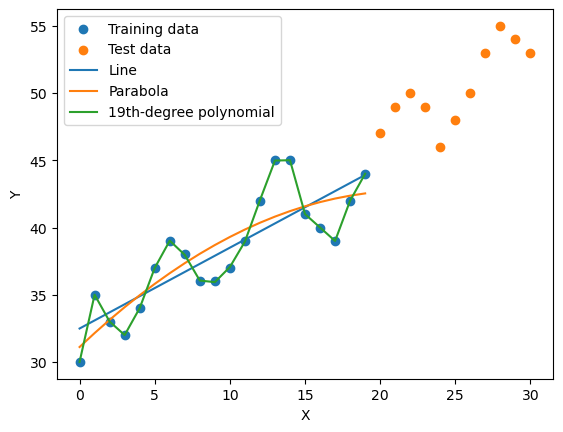

In [29]:
# (iii) 
# iii) Using the first 20 data points as training data, fit a line, parabola and 19th degree
# polynomial to the data. Compute the least-square error for each of these over the training
# points. Then compute the least square error of these models on the test data which are
# the remaining 10 data points
# fit a line to the first 20 data points

import numpy as np
import matplotlib.pyplot as plt

# Define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Split the data into training and test sets
X_train, Y_train = X[:20], Y[:20]
X_test, Y_test = X[20:], Y[20:]

# Fit a line to the training data
p1 = np.polyfit(X_train, Y_train, deg=1)
Y_train_line = np.polyval(p1, X_train)
Y_test_line = np.polyval(p1, X_test)
line_error_train = np.sqrt(np.mean((Y_train_line - Y_train) ** 2))
line_error_test = np.sqrt(np.mean((Y_test_line - Y_test) ** 2))

# Fit a parabola to the training data
p2 = np.polyfit(X_train, Y_train, deg=2)
Y_train_parabola = np.polyval(p2, X_train)
Y_test_parabola = np.polyval(p2, X_test)
parabola_error_train = np.sqrt(np.mean((Y_train_parabola - Y_train) ** 2))
parabola_error_test = np.sqrt(np.mean((Y_test_parabola - Y_test) ** 2))

# Fit a 19th-degree polynomial to the training data
p19 = np.polyfit(X_train, Y_train, deg=19)
Y_train_poly = np.polyval(p19, X_train)
Y_test_poly = np.polyval(p19, X_test)
poly_error_train = np.sqrt(np.mean((Y_train_poly - Y_train) ** 2))
poly_error_test = np.sqrt(np.mean((Y_test_poly - Y_test) ** 2))

# Print the least-squares errors
print("Training errors:")
print("Line error:", line_error_train)
print("Parabola error:", parabola_error_train)
print("19th-degree polynomial error:", poly_error_train)
print()
print("Test errors:")
print("Line error:", line_error_test)
print("Parabola error:", parabola_error_test)
print("19th-degree polynomial error:", poly_error_test)

# Plot the data and the fitted curves
plt.scatter(X_train, Y_train, label='Training data')
plt.scatter(X_test, Y_test, label='Test data')
plt.plot(X_train, Y_train_line, label='Line')
plt.plot(X_train, Y_train_parabola, label='Parabola')
plt.plot(X_train, Y_train_poly, label='19th-degree polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# p1 = np.polyfit(X[:20], Y[:20], deg=1)
# y_train_p1 = np.polyval(p1, X[:20])
# y_test_p1 = np.polyval(p1, X[20:])
# train_err_p1 = np.sum((y_train_p1 - Y[:20])**2)
# test_err_p1 = np.sum((y_test_p1 - Y[20:])**2)

# # fit a parabola to the first 20 data points
# p2 = np.polyfit(X[:20], Y[:20], deg=2)
# y_train_p2 = np.polyval(p2, X[:20])
# y_test_p2 = np.polyval(p2, X[20:])
# train_err_p2 = np.sum((y_train_p2 - Y[:20])**2)
# test_err_p2 = np.sum((y_test_p2 - Y[20:])**2)

# # fit a 19th degree polynomial to the first 20 data points
# p19 = np.polyfit(X[:20], Y[:20], deg=19)
# y_train_p19 = np.polyval(p19, X[:20])
# y_test_p19 = np.polyval(p19, X[20:])
# train_err_p19 = np.sum((y_train_p19 - Y[:20])**2)
# test_err_p19 = np.sum((y_test_p19 - Y[20:])**2)

# print("Training errors:")
# print(f"Line: {train_err_p1}")
# print(f"Parabola: {train_err_p2}")
# print(f"19th degree polynomial: {train_err_p19}")
# print("\nTest errors:")
# print(f"Line: {test_err_p1}")
# print(f"Parabola: {test_err_p2}")
# print(f"19th degree polynomial: {test_err_p19}")




C:\Users\TestTwo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Training errors:
Line error: 1.851669904329375
Parabola error: 1.8508364115957907
19th-degree polynomial error: 0.1638133765080727

Test errors:
Line error: 2.8065076975181618
Parabola error: 2.774982896893291
19th-degree polynomial error: 483.9099124568562


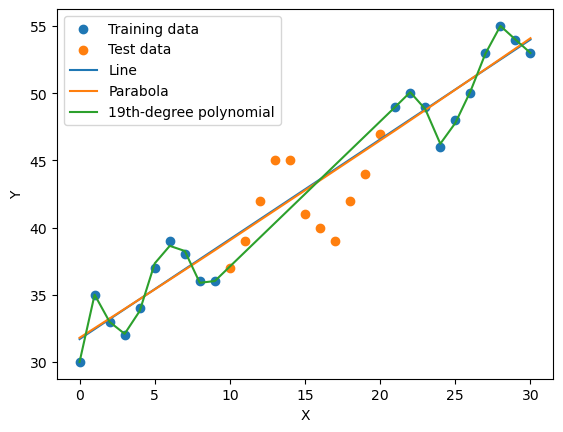

In [30]:
# (iv)
# (iv) Repeat (iii) but use the first 10 and last 10 data points as training data. Then fit the
# model to the test data (which are the 10 held out middle data points). Compare these
# results to (iii) 
# use the first 10 and last 10 data points as training data


X_train = np.concatenate((X[:10], X[-10:]))
Y_train = np.concatenate((Y[:10], Y[-10:]))

# (iii) 
# iii) Using the first 20 data points as training data, fit a line, parabola and 19th degree
# polynomial to the data. Compute the least-square error for each of these over the training
# points. Then compute the least square error of these models on the test data which are
# the remaining 10 data points
# fit a line to the first 20 data points

import numpy as np
import matplotlib.pyplot as plt

# Define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Split the data into training and test sets
# X_train, Y_train = X[:20], Y[:20]
# X_test, Y_test = X[20:], Y[20:]
X_train = np.concatenate((X[:10], X[-10:]))
Y_train = np.concatenate((Y[:10], Y[-10:]))
X_test = X[10:-10]
Y_test = Y[10:-10]

# Fit a line to the training data
p1 = np.polyfit(X_train, Y_train, deg=1)
Y_train_line = np.polyval(p1, X_train)
Y_test_line = np.polyval(p1, X_test)
line_error_train = np.sqrt(np.mean((Y_train_line - Y_train) ** 2))
line_error_test = np.sqrt(np.mean((Y_test_line - Y_test) ** 2))

# Fit a parabola to the training data
p2 = np.polyfit(X_train, Y_train, deg=2)
Y_train_parabola = np.polyval(p2, X_train)
Y_test_parabola = np.polyval(p2, X_test)
parabola_error_train = np.sqrt(np.mean((Y_train_parabola - Y_train) ** 2))
parabola_error_test = np.sqrt(np.mean((Y_test_parabola - Y_test) ** 2))

# Fit a 19th-degree polynomial to the training data
p19 = np.polyfit(X_train, Y_train, deg=19)
Y_train_poly = np.polyval(p19, X_train)
Y_test_poly = np.polyval(p19, X_test)
poly_error_train = np.sqrt(np.mean((Y_train_poly - Y_train) ** 2))
poly_error_test = np.sqrt(np.mean((Y_test_poly - Y_test) ** 2))

# Print the least-squares errors
print("Training errors:")
print("Line error:", line_error_train)
print("Parabola error:", parabola_error_train)
print("19th-degree polynomial error:", poly_error_train)
print()
print("Test errors:")
print("Line error:", line_error_test)
print("Parabola error:", parabola_error_test)
print("19th-degree polynomial error:", poly_error_test)

# Plot the data and the fitted curves
plt.scatter(X_train, Y_train, label='Training data')
plt.scatter(X_test, Y_test, label='Test data')
plt.plot(X_train, Y_train_line, label='Line')
plt.plot(X_train, Y_train_parabola, label='Parabola')
plt.plot(X_train, Y_train_poly, label='19th-degree polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()